In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import spacy  # For preprocessing
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm
import json

In [2]:
df=pd.read_json('./jieba_list.json',lines=True)
del df['_id']

In [3]:
df.head()

,書名,ISBN,str_need_list,str_need_blank,str_need_dot
0,詭圖：地圖歷史上最偉大的神話、謊言和謬誤（精裝）,9789869590235,"[詭圖, 地圖, 歷史, 上, 最偉, 大神, 話, 謊言, 謬誤, 精裝人, 類勇, 於,...",詭圖 地圖 歷史 上 最偉 大神 話 謊言 謬誤 精裝人 類勇 於 探索 未知 遠赴險 地 ...,"詭圖,地圖,歷史,上,最偉,大神,話,謊言,謬誤,精裝人,類勇,於,探索,未知,遠赴險,地,..."
1,酷刑史：99種人類的罪與罰,9789869399470,"[酷刑, 史種, 人類, 罪罰, 充滿, 鮮血, 瘋狂, 黑暗, 刑罰史, 圖解, 古今中外...",酷刑 史種 人類 罪罰 充滿 鮮血 瘋狂 黑暗 刑罰史 圖解 古今中外 處刑 拷 問車 裂木...,"酷刑,史種,人類,罪罰,充滿,鮮血,瘋狂,黑暗,刑罰史,圖解,古今中外,處刑,拷,問車,裂木..."
2,忘了自己是動物的人類：重思生命起源的歷史與身而為人的意義,9789864779376,"[忘, 自己, 動物, 人類, 重思, 生命, 起源, 歷史, 身為, 人, 意義最, 優美...",忘 自己 動物 人類 重思 生命 起源 歷史 身為 人 意義最 優美 生命 起源 敘事 重思...,"忘,自己,動物,人類,重思,生命,起源,歷史,身為,人,意義最,優美,生命,起源,敘事,重思..."
3,圖解世界史—現代卷【彩圖解說版】,9789861782645,"[圖解, 世界史, 現代卷, 彩圖, 解說, 版, 圖解, 世界史, 系列, 放眼, 全球,...",圖解 世界史 現代卷 彩圖 解說 版 圖解 世界史 系列 放眼 全球 歷史 浪漫 人文 之旅...,"圖解,世界史,現代卷,彩圖,解說,版,圖解,世界史,系列,放眼,全球,歷史,浪漫,人文,之旅..."
4,2021世界年鑑,9789869278799,"[世界, 年, 鑑內容, 豐富, 解讀, 深入, 特企, 全球, 武漢, 肺炎, 疫情, 專...",世界 年 鑑內容 豐富 解讀 深入 特企 全球 武漢 肺炎 疫情 專章 總 整理 國內外 大...,"世界,年,鑑內容,豐富,解讀,深入,特企,全球,武漢,肺炎,疫情,專章,總,整理,國內外,大..."


In [16]:
sent=df['str_need_list'].tolist()

In [19]:
## Train the genisim word2vec model with our own custom corpus
model = Word2Vec(sent, min_count=1,vector_size= 50,workers=8, window =3, sg = 1)

INFO - 15:07:15: collecting all words and their counts
INFO - 15:07:15: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:07:15: PROGRESS: at sentence #10000, processed 2138506 words, keeping 230274 word types
INFO - 15:07:16: PROGRESS: at sentence #20000, processed 4040755 words, keeping 318897 word types
INFO - 15:07:16: PROGRESS: at sentence #30000, processed 5921024 words, keeping 413305 word types
INFO - 15:07:16: PROGRESS: at sentence #40000, processed 7934979 words, keeping 524499 word types
INFO - 15:07:17: PROGRESS: at sentence #50000, processed 9921181 words, keeping 621931 word types
INFO - 15:07:17: PROGRESS: at sentence #60000, processed 12264767 words, keeping 673535 word types
INFO - 15:07:18: PROGRESS: at sentence #70000, processed 14039800 words, keeping 697813 word types
INFO - 15:07:18: PROGRESS: at sentence #80000, processed 15813486 words, keeping 722524 word types
INFO - 15:07:18: PROGRESS: at sentence #90000, processed 17169858 words, ke

INFO - 15:08:40: EPOCH 1 - PROGRESS: at 7.82% examples, 458384 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:41: EPOCH 1 - PROGRESS: at 8.35% examples, 458479 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:42: EPOCH 1 - PROGRESS: at 8.90% examples, 459187 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:43: EPOCH 1 - PROGRESS: at 9.48% examples, 459505 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:44: EPOCH 1 - PROGRESS: at 10.00% examples, 460975 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:45: EPOCH 1 - PROGRESS: at 10.43% examples, 461053 words/s, in_qsize 14, out_qsize 1
INFO - 15:08:46: EPOCH 1 - PROGRESS: at 10.91% examples, 461420 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:47: EPOCH 1 - PROGRESS: at 11.29% examples, 462042 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:48: EPOCH 1 - PROGRESS: at 11.75% examples, 462805 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:49: EPOCH 1 - PROGRESS: at 12.20% examples, 463517 words/s, in_qsize 15, out_qsize 0
INFO - 15:08:50: EPOCH 1

INFO - 15:10:06: EPOCH 1 - PROGRESS: at 61.78% examples, 467180 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:07: EPOCH 1 - PROGRESS: at 62.30% examples, 467089 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:08: EPOCH 1 - PROGRESS: at 62.71% examples, 467015 words/s, in_qsize 14, out_qsize 1
INFO - 15:10:09: EPOCH 1 - PROGRESS: at 63.05% examples, 467305 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:10: EPOCH 1 - PROGRESS: at 63.41% examples, 467230 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:11: EPOCH 1 - PROGRESS: at 63.88% examples, 467251 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:12: EPOCH 1 - PROGRESS: at 64.40% examples, 467284 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:13: EPOCH 1 - PROGRESS: at 64.94% examples, 467333 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:14: EPOCH 1 - PROGRESS: at 65.42% examples, 467534 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:15: EPOCH 1 - PROGRESS: at 65.92% examples, 467547 words/s, in_qsize 15, out_qsize 0
INFO - 15:10:16: EPO

INFO - 15:11:24: EPOCH 2 - PROGRESS: at 11.77% examples, 464995 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:25: EPOCH 2 - PROGRESS: at 12.22% examples, 465578 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:26: EPOCH 2 - PROGRESS: at 12.78% examples, 466216 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:27: EPOCH 2 - PROGRESS: at 13.41% examples, 466329 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:28: EPOCH 2 - PROGRESS: at 14.02% examples, 466871 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:29: EPOCH 2 - PROGRESS: at 14.66% examples, 468157 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:30: EPOCH 2 - PROGRESS: at 15.14% examples, 468745 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:31: EPOCH 2 - PROGRESS: at 15.74% examples, 469654 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:32: EPOCH 2 - PROGRESS: at 16.22% examples, 469216 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:33: EPOCH 2 - PROGRESS: at 16.99% examples, 468970 words/s, in_qsize 15, out_qsize 0
INFO - 15:11:34: EPO

INFO - 15:12:49: EPOCH 2 - PROGRESS: at 64.74% examples, 461636 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:50: EPOCH 2 - PROGRESS: at 65.30% examples, 461891 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:51: EPOCH 2 - PROGRESS: at 65.74% examples, 462027 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:52: EPOCH 2 - PROGRESS: at 66.41% examples, 462118 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:54: EPOCH 2 - PROGRESS: at 67.06% examples, 462272 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:55: EPOCH 2 - PROGRESS: at 67.72% examples, 462389 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:56: EPOCH 2 - PROGRESS: at 68.35% examples, 462556 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:57: EPOCH 2 - PROGRESS: at 68.99% examples, 462675 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:58: EPOCH 2 - PROGRESS: at 69.52% examples, 462641 words/s, in_qsize 15, out_qsize 0
INFO - 15:12:59: EPOCH 2 - PROGRESS: at 70.03% examples, 462724 words/s, in_qsize 15, out_qsize 0
INFO - 15:13:00: EPO

INFO - 15:14:08: EPOCH 3 - PROGRESS: at 15.04% examples, 463691 words/s, in_qsize 15, out_qsize 0
INFO - 15:14:09: EPOCH 3 - PROGRESS: at 15.50% examples, 463601 words/s, in_qsize 16, out_qsize 0
INFO - 15:14:10: EPOCH 3 - PROGRESS: at 16.05% examples, 464554 words/s, in_qsize 16, out_qsize 0
INFO - 15:14:11: EPOCH 3 - PROGRESS: at 16.72% examples, 464636 words/s, in_qsize 15, out_qsize 0
INFO - 15:14:12: EPOCH 3 - PROGRESS: at 17.46% examples, 465183 words/s, in_qsize 15, out_qsize 0
INFO - 15:14:13: EPOCH 3 - PROGRESS: at 18.20% examples, 465487 words/s, in_qsize 15, out_qsize 0
INFO - 15:14:14: EPOCH 3 - PROGRESS: at 19.13% examples, 465724 words/s, in_qsize 16, out_qsize 0
INFO - 15:14:15: EPOCH 3 - PROGRESS: at 19.79% examples, 465911 words/s, in_qsize 15, out_qsize 0
INFO - 15:14:16: EPOCH 3 - PROGRESS: at 20.35% examples, 466268 words/s, in_qsize 15, out_qsize 0
INFO - 15:14:17: EPOCH 3 - PROGRESS: at 21.03% examples, 466758 words/s, in_qsize 15, out_qsize 0
INFO - 15:14:18: EPO

INFO - 15:15:33: EPOCH 3 - PROGRESS: at 69.43% examples, 470122 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:34: EPOCH 3 - PROGRESS: at 69.95% examples, 470014 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:35: EPOCH 3 - PROGRESS: at 70.48% examples, 470119 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:36: EPOCH 3 - PROGRESS: at 71.08% examples, 469925 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:37: EPOCH 3 - PROGRESS: at 71.57% examples, 469927 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:38: EPOCH 3 - PROGRESS: at 72.08% examples, 469858 words/s, in_qsize 16, out_qsize 0
INFO - 15:15:39: EPOCH 3 - PROGRESS: at 72.52% examples, 469883 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:40: EPOCH 3 - PROGRESS: at 72.97% examples, 469881 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:42: EPOCH 3 - PROGRESS: at 73.48% examples, 469943 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:43: EPOCH 3 - PROGRESS: at 73.95% examples, 469922 words/s, in_qsize 15, out_qsize 0
INFO - 15:15:44: EPO

INFO - 15:16:52: EPOCH 4 - PROGRESS: at 19.76% examples, 453044 words/s, in_qsize 15, out_qsize 0
INFO - 15:16:53: EPOCH 4 - PROGRESS: at 20.30% examples, 453232 words/s, in_qsize 15, out_qsize 0
INFO - 15:16:54: EPOCH 4 - PROGRESS: at 20.92% examples, 453169 words/s, in_qsize 15, out_qsize 0
INFO - 15:16:55: EPOCH 4 - PROGRESS: at 21.55% examples, 453499 words/s, in_qsize 15, out_qsize 0
INFO - 15:16:56: EPOCH 4 - PROGRESS: at 22.15% examples, 453281 words/s, in_qsize 15, out_qsize 0
INFO - 15:16:57: EPOCH 4 - PROGRESS: at 22.78% examples, 452780 words/s, in_qsize 15, out_qsize 0
INFO - 15:16:58: EPOCH 4 - PROGRESS: at 23.28% examples, 452649 words/s, in_qsize 15, out_qsize 0
INFO - 15:16:59: EPOCH 4 - PROGRESS: at 23.70% examples, 451893 words/s, in_qsize 15, out_qsize 0
INFO - 15:17:00: EPOCH 4 - PROGRESS: at 24.31% examples, 451643 words/s, in_qsize 15, out_qsize 0
INFO - 15:17:01: EPOCH 4 - PROGRESS: at 24.89% examples, 451397 words/s, in_qsize 15, out_qsize 0
INFO - 15:17:02: EPO

INFO - 15:18:17: EPOCH 4 - PROGRESS: at 71.24% examples, 451590 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:18: EPOCH 4 - PROGRESS: at 71.75% examples, 451731 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:19: EPOCH 4 - PROGRESS: at 72.21% examples, 451847 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:20: EPOCH 4 - PROGRESS: at 72.66% examples, 452010 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:21: EPOCH 4 - PROGRESS: at 73.12% examples, 452138 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:22: EPOCH 4 - PROGRESS: at 73.58% examples, 452275 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:23: EPOCH 4 - PROGRESS: at 74.06% examples, 452244 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:24: EPOCH 4 - PROGRESS: at 74.58% examples, 452452 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:25: EPOCH 4 - PROGRESS: at 75.11% examples, 452657 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:26: EPOCH 4 - PROGRESS: at 75.56% examples, 452816 words/s, in_qsize 15, out_qsize 0
INFO - 15:18:27: EPO

INFO - 15:19:35: EPOCH 5 - PROGRESS: at 22.20% examples, 465446 words/s, in_qsize 15, out_qsize 0
INFO - 15:19:36: EPOCH 5 - PROGRESS: at 22.89% examples, 465350 words/s, in_qsize 15, out_qsize 0
INFO - 15:19:37: EPOCH 5 - PROGRESS: at 23.35% examples, 465210 words/s, in_qsize 15, out_qsize 0
INFO - 15:19:38: EPOCH 5 - PROGRESS: at 23.91% examples, 465317 words/s, in_qsize 16, out_qsize 0
INFO - 15:19:39: EPOCH 5 - PROGRESS: at 24.48% examples, 465060 words/s, in_qsize 15, out_qsize 0
INFO - 15:19:40: EPOCH 5 - PROGRESS: at 25.13% examples, 465128 words/s, in_qsize 14, out_qsize 1
INFO - 15:19:41: EPOCH 5 - PROGRESS: at 26.16% examples, 465131 words/s, in_qsize 15, out_qsize 0
INFO - 15:19:42: EPOCH 5 - PROGRESS: at 27.20% examples, 465224 words/s, in_qsize 15, out_qsize 0
INFO - 15:19:43: EPOCH 5 - PROGRESS: at 27.84% examples, 465148 words/s, in_qsize 15, out_qsize 0
INFO - 15:19:44: EPOCH 5 - PROGRESS: at 28.67% examples, 465090 words/s, in_qsize 15, out_qsize 0
INFO - 15:19:45: EPO

INFO - 15:21:01: EPOCH 5 - PROGRESS: at 73.92% examples, 461608 words/s, in_qsize 15, out_qsize 0
INFO - 15:21:02: EPOCH 5 - PROGRESS: at 74.40% examples, 461590 words/s, in_qsize 15, out_qsize 0
INFO - 15:21:03: EPOCH 5 - PROGRESS: at 74.92% examples, 461592 words/s, in_qsize 16, out_qsize 0
INFO - 15:21:04: EPOCH 5 - PROGRESS: at 75.34% examples, 461248 words/s, in_qsize 15, out_qsize 0
INFO - 15:21:05: EPOCH 5 - PROGRESS: at 75.76% examples, 460827 words/s, in_qsize 15, out_qsize 0
INFO - 15:21:06: EPOCH 5 - PROGRESS: at 76.25% examples, 460719 words/s, in_qsize 16, out_qsize 0
INFO - 15:21:07: EPOCH 5 - PROGRESS: at 77.27% examples, 460700 words/s, in_qsize 15, out_qsize 0
INFO - 15:21:08: EPOCH 5 - PROGRESS: at 78.31% examples, 460721 words/s, in_qsize 15, out_qsize 0
INFO - 15:21:09: EPOCH 5 - PROGRESS: at 79.52% examples, 460810 words/s, in_qsize 15, out_qsize 0
INFO - 15:21:10: EPOCH 5 - PROGRESS: at 80.51% examples, 460748 words/s, in_qsize 15, out_qsize 0
INFO - 15:21:11: EPO

In [23]:
# 詞向量
model.wv['大神']

array([-0.5171647 , -0.39935184, -0.16653712, -0.5802846 ,  1.0575011 ,
        0.20763685,  0.53274125, -0.04280122,  0.3467594 ,  0.11049095,
       -0.77497244, -0.758479  ,  0.17474788, -0.27660987, -0.27283245,
        0.59215105, -0.28140667,  0.5567605 , -0.04071011,  0.681072  ,
       -0.7881006 ,  0.9193268 ,  0.16591106, -0.24921511, -0.05995135,
        1.450425  , -0.28435805, -0.8438129 ,  0.41784993, -0.04812553,
        1.026681  ,  0.53739595, -0.12963328, -0.41256484, -0.08359559,
        0.3507104 ,  0.3016574 , -0.3752418 ,  0.30316144, -0.9169652 ,
        0.444685  , -0.24585061, -0.31990167,  0.50909793,  0.7316398 ,
        0.14086789,  0.0950188 ,  0.05697584, -0.14672476,  0.22867069],
      dtype=float32)

In [25]:
model.wv.similarity('人類', '黑暗')

0.6336732

In [27]:
model.wv.most_similar('人類')[:5]

[('當人類', 0.8674491047859192),
 ('全人類', 0.862682044506073),
 ('以人類', 0.8573290109634399),
 ('這人類', 0.8563027381896973),
 ('還人類', 0.8519771099090576)]

In [36]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model.wv[word]
    for item in target_list :
        if item != word :
            b = model.wv[item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [98]:
Maker_Model=[]
for i in sent:
    for j in i:
        Maker_Model.append(j)

In [149]:
cosine_distance (model,'總裁',a,5)

[('總經理', 0.8460885),
 ('集團', 0.84604037),
 ('財務長', 0.8152978),
 ('一姐', 0.8102501),
 ('特助', 0.80783385)]

In [150]:
for i,e in enumerate (df['str_need_list']):
    if '集團' in e:
        print(df[i:i+1]['ISBN'])
    else:
        continue

53    9789579164405
Name: ISBN, dtype: object
214    9789888694228
Name: ISBN, dtype: object
367    9789578016873
Name: ISBN, dtype: object
564    9789578654426
Name: ISBN, dtype: object
639    9789867174901
Name: ISBN, dtype: object
721    9789865509507
Name: ISBN, dtype: object
787    9789578654389
Name: ISBN, dtype: object
824    9789869625876
Name: ISBN, dtype: object
847    9789578654761
Name: ISBN, dtype: object
1146    9789573611110
Name: ISBN, dtype: object
1309    9789578724259
Name: ISBN, dtype: object
1433    9789869864572
Name: ISBN, dtype: object
1480    8667106509947
Name: ISBN, dtype: object
1504    9789863266907
Name: ISBN, dtype: object
1509    9789578654655
Name: ISBN, dtype: object
1510    9789578654327
Name: ISBN, dtype: object
1605    9789866723629
Name: ISBN, dtype: object
1664    9789881279859
Name: ISBN, dtype: object
1713    9789866037788
Name: ISBN, dtype: object
1719    8667106502580
Name: ISBN, dtype: object
1851    9789867537775
Name: ISBN, dtype: object
18

Name: ISBN, dtype: object
33399    9789578180130
Name: ISBN, dtype: object
33526    9789576217111
Name: ISBN, dtype: object
33598    9789862352908
Name: ISBN, dtype: object
34096    9789571149868
Name: ISBN, dtype: object
34389    9789861212029
Name: ISBN, dtype: object
34439    9789571163956
Name: ISBN, dtype: object
34836    9789868660908
Name: ISBN, dtype: object
34875    9789579568654
Name: ISBN, dtype: object
35159    9789571155821
Name: ISBN, dtype: object
35237    9789862957899
Name: ISBN, dtype: object
35558    9789570859270
Name: ISBN, dtype: object
35587    9789869934268
Name: ISBN, dtype: object
35610    9789864779260
Name: ISBN, dtype: object
35626    9789863233213
Name: ISBN, dtype: object
35642    9789869689717
Name: ISBN, dtype: object
35656    9789863587330
Name: ISBN, dtype: object
35805    9789860763508
Name: ISBN, dtype: object
35834    9789571158365
Name: ISBN, dtype: object
36033    9789578396371
Name: ISBN, dtype: object
36295    9789863447047
Name: ISBN, dtype: o

Name: ISBN, dtype: object
55054    9789574544370
Name: ISBN, dtype: object
55145    9789867191991
Name: ISBN, dtype: object
55965    9114725012352
Name: ISBN, dtype: object
56239    9789574798971
Name: ISBN, dtype: object
58714    9789579529181
Name: ISBN, dtype: object
58740    9789579529174
Name: ISBN, dtype: object
59838    9789862922200
Name: ISBN, dtype: object
59841    9789862922217
Name: ISBN, dtype: object
62811    9789992162941
Name: ISBN, dtype: object
63790    9789864722488
Name: ISBN, dtype: object
65425    9789861289786
Name: ISBN, dtype: object
67744    9789867506078
Name: ISBN, dtype: object
68718    9789866306310
Name: ISBN, dtype: object
69472    9789869437493
Name: ISBN, dtype: object
70788    2014010780065
Name: ISBN, dtype: object
71394    4717702102852
Name: ISBN, dtype: object
72577    4715006450723
Name: ISBN, dtype: object
73279    9789862957035
Name: ISBN, dtype: object
76355    9789864301737
Name: ISBN, dtype: object
78707    9789862831717
Name: ISBN, dtype: o

Name: ISBN, dtype: object
151817    9789863018070
Name: ISBN, dtype: object
152025    9789865044343
Name: ISBN, dtype: object
152047    9789862964378
Name: ISBN, dtype: object
152366    9789865157883
Name: ISBN, dtype: object
152595    9789865019518
Name: ISBN, dtype: object
152864    9789863615422
Name: ISBN, dtype: object
153316    9789863191964
Name: ISBN, dtype: object
153472    9789865660727
Name: ISBN, dtype: object
153614    9789863519294
Name: ISBN, dtype: object
153733    9789865686130
Name: ISBN, dtype: object
153787    9789861438894
Name: ISBN, dtype: object
153915    9789865743055
Name: ISBN, dtype: object
153958    9789865913915
Name: ISBN, dtype: object
154343    9789866535901
Name: ISBN, dtype: object
154365    9789866535796
Name: ISBN, dtype: object
154387    9789866535710
Name: ISBN, dtype: object
154390    9789866535673
Name: ISBN, dtype: object
154394    9789866535598
Name: ISBN, dtype: object
154407    9789866535499
Name: ISBN, dtype: object
154438    9789866535505


Name: ISBN, dtype: object
179759    9789864836178
Name: ISBN, dtype: object
179760    9789864836918
Name: ISBN, dtype: object
180096    9789864832279
Name: ISBN, dtype: object
180097    9789864833801
Name: ISBN, dtype: object
180125    9789864833795
Name: ISBN, dtype: object
180151    9789864833788
Name: ISBN, dtype: object
180289    9789864830701
Name: ISBN, dtype: object
180319    9789864831043
Name: ISBN, dtype: object
180432    9789869421966
Name: ISBN, dtype: object
180564    9789869403344
Name: ISBN, dtype: object
180609    9789869389822
Name: ISBN, dtype: object
180620    9789869387729
Name: ISBN, dtype: object
180763    9789869371384
Name: ISBN, dtype: object
180968    9789864689149
Name: ISBN, dtype: object
181015    9789864608942
Name: ISBN, dtype: object
181202    9789864608119
Name: ISBN, dtype: object
181286    9789864686797
Name: ISBN, dtype: object
181326    9789864686902
Name: ISBN, dtype: object
181343    9789864686773
Name: ISBN, dtype: object
181360    9789864607808


207640    9789863316633
Name: ISBN, dtype: object
207666    9789861712888
Name: ISBN, dtype: object
210809    9789571086750
Name: ISBN, dtype: object
210810    9789571086767
Name: ISBN, dtype: object
211083    9789864672677
Name: ISBN, dtype: object
213424    9789863193623
Name: ISBN, dtype: object
213532    9789864658718
Name: ISBN, dtype: object
213997    4711225856506
Name: ISBN, dtype: object
214099    9789862888568
Name: ISBN, dtype: object
214206    9789864847228
Name: ISBN, dtype: object
214208    9789864847433
Name: ISBN, dtype: object
214512    4713025433147
Name: ISBN, dtype: object
214835    4711228580972
Name: ISBN, dtype: object
214836    9789571061276
Name: ISBN, dtype: object
214844    9789571083407
Name: ISBN, dtype: object
214855    9789571078670
Name: ISBN, dtype: object
214856    9789571078687
Name: ISBN, dtype: object
214860    9789860607253
Name: ISBN, dtype: object
214889    9789579439893
Name: ISBN, dtype: object
214892    9789579439657
Name: ISBN, dtype: object


237097    9789579680035
Name: ISBN, dtype: object
237245    9789869061209
Name: ISBN, dtype: object
237331    9789868858633
Name: ISBN, dtype: object
237354    9789865072612
Name: ISBN, dtype: object
237464    9789868617865
Name: ISBN, dtype: object
237513    4717702902629
Name: ISBN, dtype: object
237527    9789579164108
Name: ISBN, dtype: object
237735    9789866546891
Name: ISBN, dtype: object
237783    9789868967984
Name: ISBN, dtype: object
237924    9789866307348
Name: ISBN, dtype: object
238186    9789867282736
Name: ISBN, dtype: object
238632    9789869611718
Name: ISBN, dtype: object
238677    9789865770709
Name: ISBN, dtype: object
238680    9789574706440
Name: ISBN, dtype: object
238710    9789863441632
Name: ISBN, dtype: object
238770    9789866616839
Name: ISBN, dtype: object
238878    9789866340734
Name: ISBN, dtype: object
238975    9789861341545
Name: ISBN, dtype: object
238986    9789866572722
Name: ISBN, dtype: object
239034    9789866424205
Name: ISBN, dtype: object


Name: ISBN, dtype: object
293957    9789866703317
Name: ISBN, dtype: object
294207    9789864071319
Name: ISBN, dtype: object
295276    9789578180666
Name: ISBN, dtype: object
295806    9789866194948
Name: ISBN, dtype: object
295857    9789868484658
Name: ISBN, dtype: object
296380    9789575324971
Name: ISBN, dtype: object
296680    9789575324933
Name: ISBN, dtype: object
296683    9789575324940
Name: ISBN, dtype: object
296923    9789575324902
Name: ISBN, dtype: object
297180    9789575324896
Name: ISBN, dtype: object
298144    9789868895102
Name: ISBN, dtype: object
298428    9789865676773
Name: ISBN, dtype: object
298564    9789869855655
Name: ISBN, dtype: object
298765    9789864071364
Name: ISBN, dtype: object
299438    9789869369756
Name: ISBN, dtype: object
299581    9789866224966
Name: ISBN, dtype: object
299582    9789575324186
Name: ISBN, dtype: object
299585    9789575324179
Name: ISBN, dtype: object
299596    9789575324162
Name: ISBN, dtype: object
299597    9789575324155


Name: ISBN, dtype: object
362643    9789864745197
Name: ISBN, dtype: object
362916    9789864317929
Name: ISBN, dtype: object
362969    9789861794280
Name: ISBN, dtype: object
363274    9789864741083
Name: ISBN, dtype: object
363431    9789573289593
Name: ISBN, dtype: object
363643    9789864783786
Name: ISBN, dtype: object
363704    9789864931187
Name: ISBN, dtype: object
364821    9789863939016
Name: ISBN, dtype: object
365743    9789863100966
Name: ISBN, dtype: object
366192    9789862567074
Name: ISBN, dtype: object
366778    4711552448801
Name: ISBN, dtype: object
367891    9789869296342
Name: ISBN, dtype: object
368470    9789867854100
Name: ISBN, dtype: object
368808    9789578017788
Name: ISBN, dtype: object
369677    9789868980259
Name: ISBN, dtype: object
369960    9786260059606
Name: ISBN, dtype: object
370470    9789571068251
Name: ISBN, dtype: object
370509    9789869810807
Name: ISBN, dtype: object
370526    9789571066004
Name: ISBN, dtype: object
370532    9789571064987


Name: ISBN, dtype: object
408357    9789571067469
Name: ISBN, dtype: object
408412    9789863659747
Name: ISBN, dtype: object
409361    9789864740093
Name: ISBN, dtype: object
409392    4715409857310
Name: ISBN, dtype: object
409425    9789863325239
Name: ISBN, dtype: object
409497    9789861072739
Name: ISBN, dtype: object
409579    9789861184821
Name: ISBN, dtype: object
409734    4713006548761
Name: ISBN, dtype: object
409864    9789862379790
Name: ISBN, dtype: object
409889    9789862376270
Name: ISBN, dtype: object
409962    9789862371428
Name: ISBN, dtype: object
410001    9789861749013
Name: ISBN, dtype: object
410056    9789861746234
Name: ISBN, dtype: object
410203    9789861188409
Name: ISBN, dtype: object
410214    9789861761831
Name: ISBN, dtype: object
410644    9789574597888
Name: ISBN, dtype: object
410745    9789573436423
Name: ISBN, dtype: object
410955    9789863651628
Name: ISBN, dtype: object
411161    9789865121013
Name: ISBN, dtype: object
411513    9789578661356


Name: ISBN, dtype: object
430277    9789863896067
Name: ISBN, dtype: object
430300    9789864452958
Name: ISBN, dtype: object
430318    9789861167503
Name: ISBN, dtype: object
430481    4712847181342
Name: ISBN, dtype: object
430586    4712847181182
Name: ISBN, dtype: object
430710    9789863893363
Name: ISBN, dtype: object
430757    9789863893257
Name: ISBN, dtype: object
430790    9789863892724
Name: ISBN, dtype: object
430798    9789863892663
Name: ISBN, dtype: object
430817    9789863892533
Name: ISBN, dtype: object
430819    9789863892540
Name: ISBN, dtype: object
431011    9789863825623
Name: ISBN, dtype: object
431062    4714781869621
Name: ISBN, dtype: object
431067    4714781869300
Name: ISBN, dtype: object
431078    4712847180543
Name: ISBN, dtype: object
431141    4712847180413
Name: ISBN, dtype: object
431185    4714781868174
Name: ISBN, dtype: object
431195    4714781868167
Name: ISBN, dtype: object
431481    9789865782276
Name: ISBN, dtype: object
431486    9789868992061


Name: ISBN, dtype: object
444337    9789869420464
Name: ISBN, dtype: object
444343    9789863982180
Name: ISBN, dtype: object
444354    9789869352918
Name: ISBN, dtype: object
444370    9789862485224
Name: ISBN, dtype: object
444382    9789571362984
Name: ISBN, dtype: object
444383    9789869165143
Name: ISBN, dtype: object
444401    9789866133121
Name: ISBN, dtype: object
444427    9789865002459
Name: ISBN, dtype: object
444434    9789865001872
Name: ISBN, dtype: object
444456    9789863759928
Name: ISBN, dtype: object
444458    4711552447040
Name: ISBN, dtype: object
444459    9789863759874
Name: ISBN, dtype: object
444462    4711552447033
Name: ISBN, dtype: object
444480    9789863756460
Name: ISBN, dtype: object
444488    9789888292882
Name: ISBN, dtype: object
444490    9789863755098
Name: ISBN, dtype: object
444498    9789869211208
Name: ISBN, dtype: object
444513    9789869187893
Name: ISBN, dtype: object
444529    9789863204473
Name: ISBN, dtype: object
444545    9789868896918


Name: ISBN, dtype: object
457560    9789864868346
Name: ISBN, dtype: object
457612    9789869615686
Name: ISBN, dtype: object
457621    9789864708161
Name: ISBN, dtype: object
457631    9789862137697
Name: ISBN, dtype: object
457632    9789862137758
Name: ISBN, dtype: object
457633    9789862137710
Name: ISBN, dtype: object
457637    9789864314287
Name: ISBN, dtype: object
457649    9789862137703
Name: ISBN, dtype: object
457726    4715409861072
Name: ISBN, dtype: object
457787    9789861090931
Name: ISBN, dtype: object
457794    9789861093130
Name: ISBN, dtype: object
457817    9789866254833
Name: ISBN, dtype: object
457821    4715409853725
Name: ISBN, dtype: object
457859    9789861098432
Name: ISBN, dtype: object
457882    9789578848177
Name: ISBN, dtype: object
457965    9789861072159
Name: ISBN, dtype: object
458002    9789620422782
Name: ISBN, dtype: object
458047    9789861058917
Name: ISBN, dtype: object
458067    9789577091642
Name: ISBN, dtype: object
458093    4713469359584


In [125]:
jieba.lcut('魂草')

['魂草']

In [132]:
a = set(Maker_Model)

In [102]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.wv.similar_by_word(word)

    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

<IPython.core.display.Javascript object>


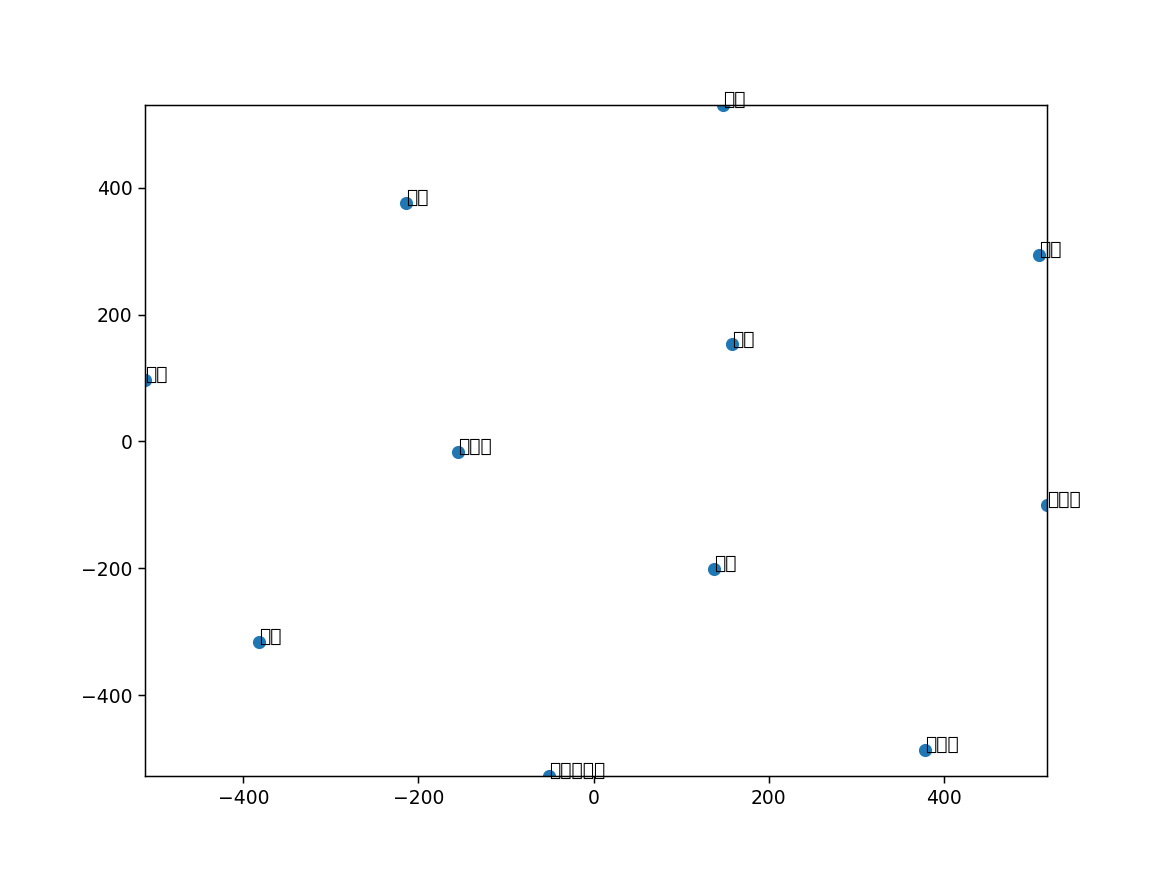

In [103]:
display_closestwords_tsnescatterplot(model, '總裁', 50)